<h1>Analyse de la syntaxe des protocoles inconnus basée sur les réseaux de neurones convolutifs : Une preuve de concept inspirée de l'article scientifique

<h2>Réalisé par:<br>


<li>Mohamed Raghib</li>

<h2>Encadré par:

<li>Pr. Bruno Denis</li>

<h2>Introduction

L’article "An unknown protocol syntax analysis method based on convolutional neural network" de Yichuan Wang, Binbin Bai, Xinhong Hei, Lei Zhu et Wenjiang Ji propose une méthode de classification et d’analyse de protocoles réseau inconnus en utilisant des réseaux de neurones convolutionnels (CNN). Leur approche consiste à convertir les paquets réseau bruts en images, puis à entraîner un CNN à reconnaître des schémas syntaxiques spécifiques aux protocoles. Les auteurs prétendent que cette méthodologie permet d’identifier et de distinguer divers protocoles de manière robuste et automatique, sans connaissance préalable approfondie de la syntaxe du protocole.
Dans ce travail, nous proposons de reproduire leur approche dans un cadre de preuve de concept (PoC). Notre objectif est de :
1.	Mettre en œuvre leur pipeline de transformation des paquets en images.
2.	Entraîner un CNN similaire ou identique à celui qu’ils décrivent, sur un jeu de données couvrant plusieurs protocoles IoT (ARP, DNS, ICMP, TCP, UDP).
3.	Évaluer si les résultats obtenus, en termes de précision, de robustesse et de capacité de généralisation, sont comparables à ceux rapportés par l’article original.
Cette étude de reproductibilité est importante pour valider la solidité de leur approche, mesurer sa robustesse dans un contexte légèrement différent (par exemple, d’autres sources de paquets, un environnement expérimental différent), et éventuellement identifier des conditions ou des hypothèses non explicites dans l’article original.


<h2>Chapitre 1 : Concepts Clés Liés au Projet et à l’Article

<h3>1.1 Protocoles réseau dans les communications IoT

Les protocoles réseau sont des règles et des formats standards qui régissent la communication entre appareils dans un réseau. Dans le contexte de l’Internet des Objets (IoT), ces protocoles jouent un rôle crucial en permettant l’interconnexion de milliards de dispositifs. Parmi les protocoles les plus couramment utilisés figurent :<br>
  •	ARP (Address Resolution Protocol) : Permet de mapper une adresse IP à une adresse MAC dans un réseau local.<br>
  •	DNS (Domain Name System) : Assure la résolution des noms de domaine en adresses IP.<br>
  •	ICMP (Internet Control Message Protocol) : Utilisé pour diagnostiquer les erreurs réseau et fournir des rapports d'état (exemple : commande ping).<br>
  •	TCP (Transmission Control Protocol) : Garantit une transmission fiable des données entre appareils grâce à des mécanismes de vérification et de retransmission.<br>
  •	UDP (User Datagram Protocol) : Offre une transmission rapide des données, mais sans garantie de réception, souvent utilisé pour les flux en temps réel (vidéo, audio).<br>
Ces protocoles, bien que connus, possèdent des caractéristiques syntaxiques propres, ce qui permet de les distinguer dans un trafic réseau hétérogène. Cependant, l’identification manuelle de ces protocoles dans des paquets réseau capturés est un processus complexe et fastidieux.



<h3>1.2 Vision par ordinateur appliquée à l’analyse réseau

L’analyse de trafic réseau traditionnelle repose sur des outils comme Wireshark ou des approches basées sur des règles. Cependant, ces méthodes peuvent être limitées face à des protocoles complexes, inconnus ou chiffrés.<br>
La vision par ordinateur, une branche de l’intelligence artificielle (IA), offre une alternative intéressante en permettant de traiter les données réseau sous forme d’images. En transformant les paquets réseau en représentations visuelles (images en niveaux de gris), il devient possible d’exploiter des modèles avancés comme les réseaux de neurones convolutionnels (CNN) pour détecter des motifs et des caractéristiques spécifiques à chaque protocole. Cette approche, introduite par Wang et al., ouvre la voie à une classification automatisée des protocoles réseau.


<h3>1.3 Réseaux de neurones convolutionnels (CNN)

Les réseaux de neurones convolutionnels (CNN) sont une architecture d’apprentissage profond particulièrement adaptée au traitement d’images. Ils se composent de plusieurs types de couches :<br>
•	Couches convolutives (Conv2D) : Extraient des caractéristiques (features) de l’image, comme des motifs ou des textures spécifiques. Chaque couche convolutive applique des filtres pour détecter des éléments visuels dans des zones locales.<br>
•	Couches de pooling (MaxPooling) : Réduisent la dimensionnalité des données pour accélérer le calcul et réduire le surapprentissage, tout en conservant les informations les plus importantes.<br>
•	Couches entièrement connectées (Dense) : Apprennent à classer les caractéristiques extraites en assignant des probabilités à chaque classe.<br>
•	Fonction d’activation : Utilise des fonctions comme ReLU ou softmax pour introduire des non-linéarités et calculer les scores finaux.<br>
Les CNN sont particulièrement puissants dans la reconnaissance de motifs complexes, comme ceux présents dans les images, ce qui en fait un choix pertinent pour classer des images générées à partir de données réseau.


<h2>Chapitre 2 : Critères pour Évaluer la Solution proposée


L’évaluation d’une solution proposée dans le cadre de ce projet repose sur des critères quantitatifs et qualitatifs qui permettent de mesurer la performance, la robustesse et l’applicabilité de la méthode décrite par Wang et al. Ces critères couvrent différents aspects de la classification des protocoles IoT et de la méthodologie mise en œuvre.
Les critères de performance évaluent directement la capacité du modèle à classifier correctement les protocoles :<br>
	Précision globale (Accuracy) :
La précision globale mesure la proportion de prédictions correctes sur l’ensemble des échantillons de test. Elle est définie comme suit :<br>
                                         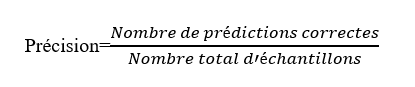<br>
	Loss et val_loss :
	Loss (perte) : Mesure l’erreur du modèle sur les données d’entraînement pendant l’apprentissage. Une loss décroissante indique que le modèle s’améliore au fil des époques.
	Validation loss (val_loss) : Mesure l’erreur du modèle sur le jeu de validation. Une différence importante entre la perte d’entraînement (loss) et la perte de validation (val_loss) peut indiquer un surapprentissage (overfitting).
	Les courbes de loss et val_loss au cours des époques permettent d’analyser la convergence et la généralisation du modèle.



<h2>Chapitre 3 : Présentation du Dataset de Référence

<h3>3.1 Origine des Données

Le dataset utilisé dans ce projet est principalement constitué de captures réseau disponibles publiquement sur le site Wireshark Wiki (Sample Captures). Ce site fournit une collection riche et variée de fichiers PCAP (Packet Capture) capturant divers types de trafic réseau, couvrant des protocoles couramment utilisés dans les communications IoT.
Détails des données extraites :<br>
•	Les fichiers PCAP ont été sélectionnés spécifiquement pour contenir des paquets des cinq protocoles suivants :<br>
o	ARP (Address Resolution Protocol)<br>
o	DNS (Domain Name System)<br>
o	ICMP (Internet Control Message Protocol)<br>
o	TCP (Transmission Control Protocol)<br>
o	UDP (User Datagram Protocol)<br>
•	Chaque fichier PCAP a été inspecté et traité pour extraire uniquement les paquets pertinents correspondant à ces protocoles.


<h3>3.2 Processus de Transformation des Données

Pour rendre les données exploitables par le modèle CNN, les paquets capturés dans les fichiers PCAP ont été transformés en images en suivant un pipeline automatisé. Voici les étapes principales:<br>

Extraction des paquets :<br>

Les fichiers PCAP ont été chargés à l’aide de Scapy, un outil puissant pour l’analyse et la manipulation des paquets réseau.<br>
Chaque paquet a été inspecté pour identifier son protocole sous-jacent (ARP, DNS, ICMP, TCP, UDP) en utilisant la fonction haslayer() de Scapy. Cette fonction permet de vérifier la présence d’un protocole spécifique dans la structure du paquet.<br>
Conversion en représentation binaire :<br>
<br>
Les données brutes des paquets (payload) ont été extraites et converties en une séquence binaire.<br>
La séquence binaire a ensuite été normalisée à une longueur fixe de 320 bits :<br>
Tronquée si elle dépassait 320 bits.<br>
Complétée par des zéros si elle était plus courte.<br>
Transformation en image 8x8 :<br>

La séquence binaire a été regroupée en octets (8 bits chacun), ce qui donne 40 valeurs d’intensité (0-255).<br>
Ces intensités ont été organisées dans une matrice de 8x8 pixels pour former une image en niveaux de gris.<br>
Étiquetage :<br>
<br>
Chaque image générée a été associée au protocole correspondant (ARP, DNS, ICMP, TCP, UDP), basé sur les métadonnées du paquet.<br>
Les codes d’automatisation correspondant à ces étapes ont été développés pour chaque protocole et sont regroupés dans le dossier "Automatisation". Ce dossier contient des scripts dédiés pour importer les fichiers PCAP, extraire les paquets souhaités, les transformer en images, et les organiser automatiquement dans des répertoires structurés par protocole.

<h2>Chapitre 4 : Modélisation de la Résolution du Problème


Ce chapitre présente une modélisation visuelle et structurée du pipeline mis en place pour classifier les protocoles réseau à l'aide de réseaux de neurones convolutionnels (CNN). Deux outils sont utilisés pour formaliser ce pipeline :<br>

Un diagramme de classe, qui décrit les principales entités et leurs relations.<br>
Un diagramme d'activité, qui illustre les étapes du processus sous forme séquentielle.<br>
Ces diagrammes permettent de comprendre clairement les interactions entre les composantes et les étapes clés du projet.

<h3>4.2 Diagramme de Classe


Le diagramme de classe ci-dessous montre les entités principales impliquées dans le pipeline, depuis l'importation des fichiers PCAP jusqu'à l'entraînement et l'évaluation du modèle CNN.

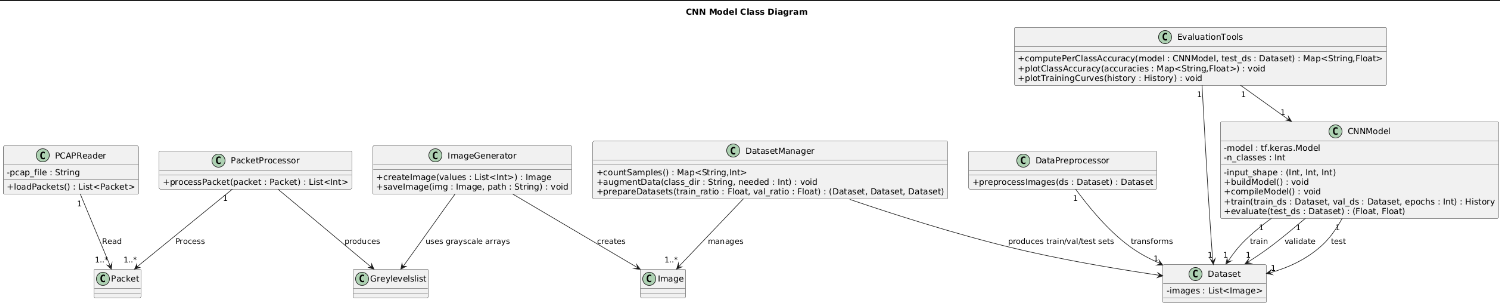

<b>Description :


PCAPReader : Lit les fichiers PCAP et extrait les paquets réseau.<br>
PacketProcessor : Convertit les paquets en niveaux de gris.<br>
ImageGenerator : Génère des images 8x8 à partir des données binaires et les sauvegarde.<br>
DatasetManager : Organise les données en ensembles d'entraînement, validation et test, avec augmentation.<br>
CNNModel : Implémente le réseau CNN pour la classification.<br>
EvaluationTools : Calcule les métriques et génère des visualisations des performances.

<h3>4.3 Diagramme d’Activité


Le diagramme d’activité suivant illustre les étapes principales du pipeline, depuis la transformation des données jusqu'à l'entraînement et la prédiction.

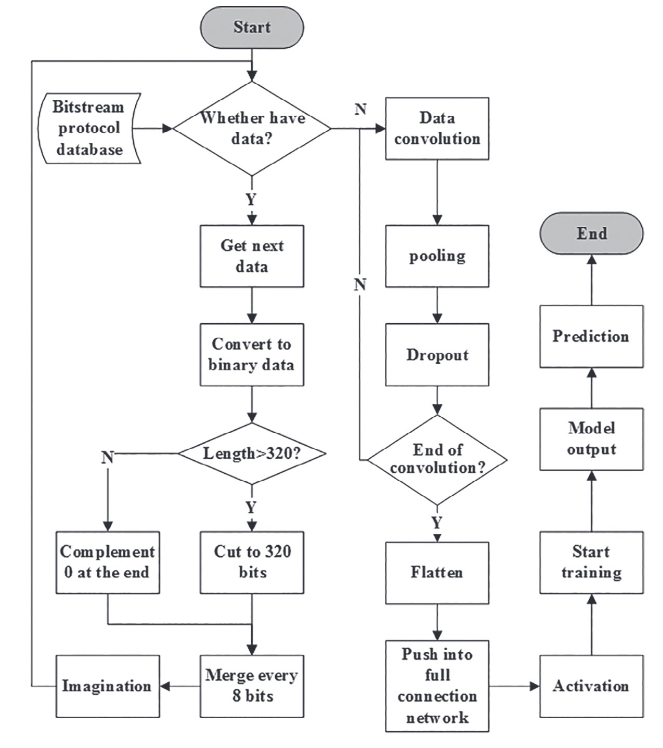

<b>Étapes clés :


Charger les paquets depuis un fichier PCAP.<br>
Convertir les paquets en données binaires.<br>
Normaliser les données à 320 bits et les transformer en images 8x8.<br>
Préparer le dataset (train/validation/test).<br>
Entraîner le modèle CNN.<br>
Effectuer des prédictions et évaluer les performances.

<h2>Chapitre 5 : Processus de Mise en Œuvre


<h3>Importation des bibliothèques

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models, layers

<h3>Chargement du dataset et identification des classes dans le dataset 

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../Dataset", shuffle=True, image_size=(256, 256), batch_size=128, color_mode='grayscale'
)


Found 50427 files belonging to 5 classes.


In [4]:
class_names=dataset.class_names
class_names

['ARP', 'DNS', 'ICMP', 'TCP', 'UDP']

<h3>Visualisation d'échantillons du dataset

(128, 256, 256, 1)


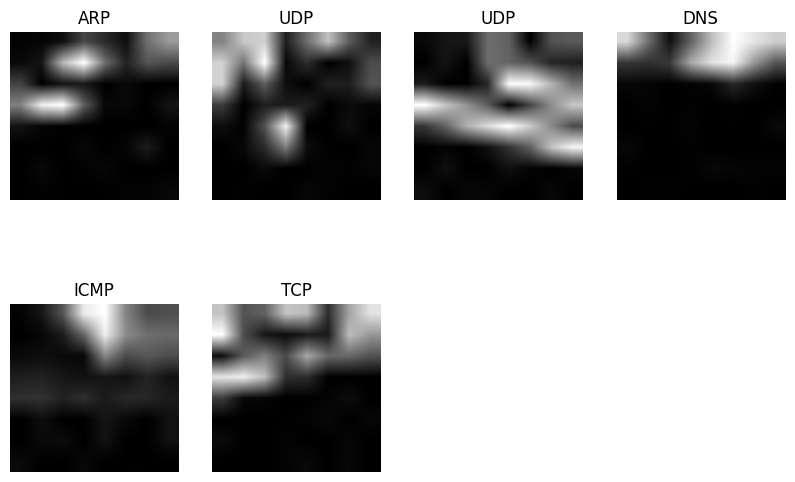

In [5]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
 for i in range(6):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"), cmap='gray')
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

print(image_batch.shape)

<h3>Division du dataset en ensembles d’entraînement, validation et test

In [27]:
# Nombre total de batches
num_batches = len(dataset)

# Calcul des tailles pour chaque split
train_size = int(0.8 * num_batches)  # 80% pour l'entraînement
valid_size = int(0.1 * num_batches)  # 10% pour validation
test_size = num_batches - train_size - valid_size  # Le reste pour le test

# Diviser le dataset
train_ds = dataset.take(train_size)                      # Prend les 80% premiers
valid_ds = dataset.skip(train_size).take(valid_size)     # Prend les 10% suivants
test_ds = dataset.skip(train_size + valid_size)          # Prend le reste

# Vérification des tailles
print(f"Training batches: {len(list(train_ds))}")
print(f"Validation batches: {len(list(valid_ds))}")
print(f"Test batches: {len(list(test_ds))}")


Training batches: 315
Validation batches: 39
Test batches: 40


In [28]:
def preprocess(x, y):
    # Debug : Affiche la forme de "x" avant le redimensionnement
    tf.print("Shape of x before resizing:", tf.shape(x))

    # Si "x" a 5 dimensions, supprimer la deuxième dimension (de taille 32)
    # Cela peut arriver si les données contiennent une dimension supplémentaire inutile
    if len(x.shape) == 5:
        x = tf.squeeze(x, axis=1)  # Supprime la dimension inutile

    # Si "x" a 3 dimensions (image en niveaux de gris sans canal explicite), ajouter un canal
    # Nécessaire pour s'assurer que les données ont une structure cohérente pour le CNN
    if len(x.shape) == 3:  # (hauteur, largeur, batch)
        x = tf.expand_dims(x, axis=-1) # Ajoute une dimension de canal

    # Redimensionne l'image à la taille (256, 256)
    x = tf.image.resize(x, (256, 256))

    return x, y
# Applique la fonction de prétraitement aux datasets d'entraînement, de validation et de test
train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
valid_ds = valid_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)



<h3>Optimisation des ensembles de données pour l'entraînement

In [29]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds = valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<h3>Calcul du nombre de lots dans le dataset d'entraînement

In [30]:
num_batches = tf.data.experimental.cardinality(train_ds).numpy()
print(f"Number of batches: {num_batches}")

Number of batches: 315


<h3>Limitation du dataset d'entraînement

In [31]:
train_ds = train_ds.take(200)

<h3>Création d'un pipeline de redimensionnement et de normalisation des images

In [32]:
resize_rescale = tf.keras.Sequential([
   layers.Resizing(255 , 255),
    layers.Rescaling(1/255)
])

<h3>Application de la data augmentation sur les images

In [33]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    
])

<h3>Construction du modèle CNN

In [34]:
input_shape=(256, 256, 1)
n_classes = 5

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),# Première couche convolutive avec 32 filtres, un kernel de taille (3, 3), et une activation ReLU
    tf.keras.layers.MaxPooling2D(2, 2),# Couche de pooling pour réduire la dimension spatiale de moitié (2x2)
    tf.keras.layers.Flatten(),# Couche Flatten pour transformer les matrices en vecteurs 1D
    tf.keras.layers.Dense(128, activation='relu'),# Couche fully connected avec 128 neurones et activation ReLU
    tf.keras.layers.Dense(5, activation='softmax')  # Couche de sortie fully connected avec une activation softmax pour produire des probabilités sur les 5 classes
])

model.build(input_shape=(None, *input_shape))

<h3>Résumé de l'architecture du modèle CNN

In [35]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 516128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    66,064,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,065,477 (252.02 MB)

 Trainable params: 66,065,477 (252.02 MB)

 Non-trainable params: 0 (0.00 B)

<h3>Conversion des labels en encodage one-hot

In [36]:
def preprocess_label(label):
    label = tf.one_hot(label, depth=n_classes)  # Convertit les labels en encodage one-hot avec n_classes dimensions
    return label
# Applique la conversion one-hot aux labels du dataset d'entraînement

train_ds = train_ds.map(lambda x, y: (x, preprocess_label(y)), num_parallel_calls=tf.data.AUTOTUNE)
# Applique la conversion one-hot aux labels du dataset de validation

valid_ds = valid_ds.map(lambda x, y: (x, preprocess_label(y)), num_parallel_calls=tf.data.AUTOTUNE)


<h3>Compilation du modèle CNN

In [37]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

<h3>Vérification de la validité des datasets

In [38]:
# Vérifie que le dataset d'entraînement contient des données
assert tf.data.experimental.cardinality(train_ds).numpy() > 0, "Train dataset is empty or improperly defined"
# Vérifie que le dataset de validation contient des données
assert tf.data.experimental.cardinality(valid_ds).numpy() > 0, "Validation dataset is empty or improperly defined"


<h3>Vérification des dimensions des lots dans le dataset d'entraînement

In [39]:
for batch in train_ds.take(1):
    print(f"Image batch shape: {batch[0].shape}")  # Expecté: (batch_size, 256, 256, 1)
    print(f"Label batch shape: {batch[1].shape}")  # Expecté: (batch_size, 5)



Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128

<h3>Entraînement du modèle CNN

In [40]:
fit = model.fit(
    train_ds,
    epochs=30,
    verbose=1,
    validation_data=valid_ds,
    
)


Epoch 1/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.6110 - loss: 153.3308Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [12

<h2>Chapitre 6: Résultats et Comparaison avec l'Article de Référence

<h3>Extraction des métriques d'entraînement et de validation

In [44]:
acc = fit.history['accuracy']
val_acc = fit.history['val_accuracy']
loss = fit.history['loss']
val_loss = fit.history['val_loss']

<h3>Visualisation des courbes de précision d'entraînement et de validation

Text(0.5, 1.0, 'Training and validation accuracy')

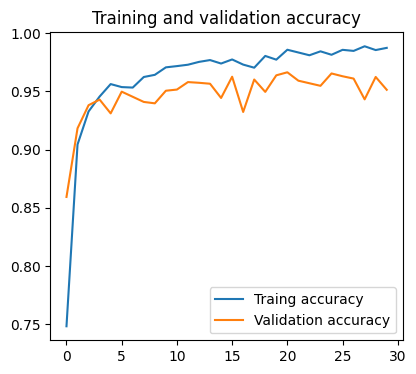

In [45]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(30), acc, label='Traing accuracy')
plt.plot(range(30), val_acc, label='Validation accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and validation accuracy')

<h3>Visualisation du courbes de précision de l'article original

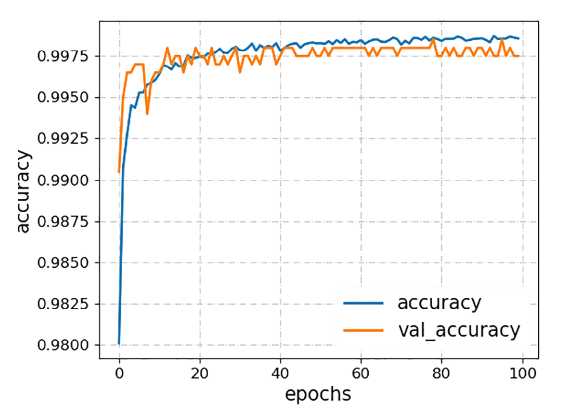

<h3>Conclusion

La comparaison des courbes de précision entre notre modèle et celui de l'article révèle plusieurs points importants :<br>

Tendance générale similaire : Dans les deux cas, la précision d'entraînement et de validation augmente rapidement au début pour converger progressivement. Cela indique que les deux modèles sont capables d'apprendre efficacement les caractéristiques des protocoles.<br>

Précision finale : Le modèle de l'article atteint une précision supérieure (environ 99.75%) par rapport à notre implémentation (95%). Cette différence peut être liée à des variations dans les datasets, les hyperparamètres ou le nombre d'époques.



<h3>Visualisation des courbes de perte d'entraînement et de validation

Text(0.5, 1.0, 'Training and validation loss')

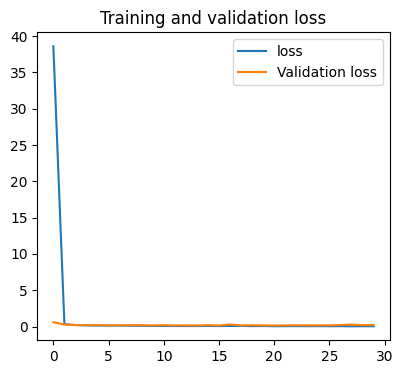

In [46]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(30), loss, label='loss')
plt.plot(range(30), val_loss, label='Validation loss')
plt.legend(loc= 'upper right')
plt.title('Training and validation loss')

<h3>Visualisation du courbe de perte de l'article original

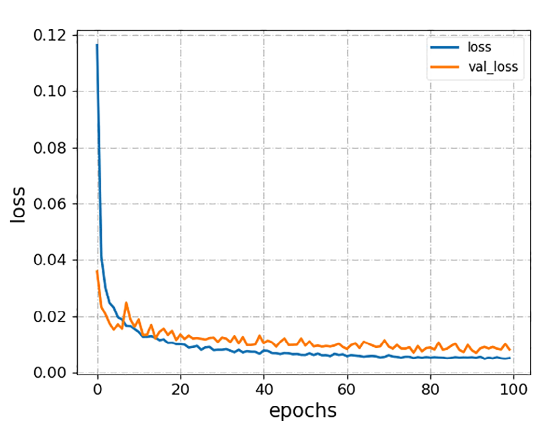

<h3>Conclusion

Similarités :<br>
Dans les deux cas, les pertes d'entraînement et de validation diminuent rapidement pendant les premières époques, montrant que le modèle apprend efficacement.<br>
La perte continue de diminuer progressivement, suggérant une convergence vers une solution optimisée.

<h3>Analyse de la précision par classe pour chaque protocole

Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128 256 256 1]
Shape of x before resizing: [128

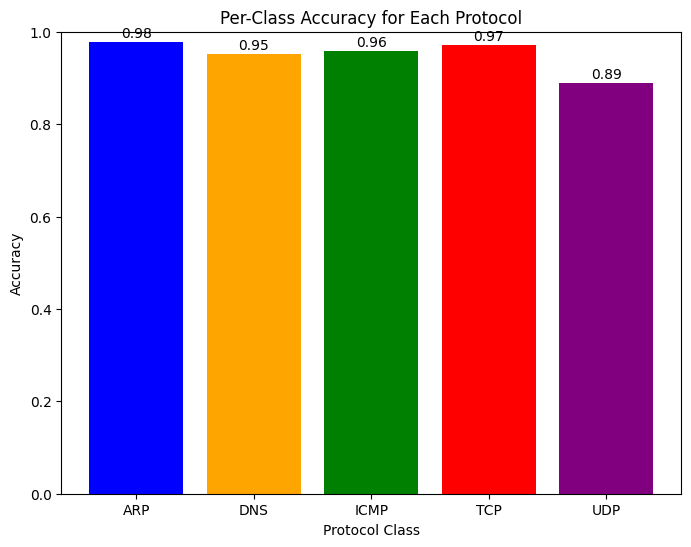

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des classes de protocoles
classes = ["ARP", "DNS", "ICMP", "TCP", "UDP"]

# Étape 1 : Obtenir les prédictions et les étiquettes du dataset de test
y_true = []
y_pred = []

for images, labels in test_ds:
    
    y_true.extend(labels.numpy().argmax(axis=1) if len(labels.shape) > 1 else labels.numpy())

    # Obtenir les prédictions du modèle
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    y_pred.extend(predicted_labels)
# Conversion des listes en tableaux numpy pour une manipulation plus facile

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Étape 2 : Calculer la précision par classe
accuracy_per_class = []
for i, cls in enumerate(classes):
    # Extraire les indices où la classe réelle correspond à la classe actuelle
    idx = np.where(y_true == i)[0]
        # Calculer combien de prédictions sont correctes pour cette classe
    correct = np.sum(y_pred[idx] == i)
    # Calculer la précision pour la classe actuelle

    acc = correct / len(idx) if len(idx) > 0 else 0.0
    accuracy_per_class.append(acc)

# Étape 3 : Créer un graphique en barres
colors = ["blue", "orange", "green", "red", "purple"]

plt.figure(figsize=(8, 6))
plt.bar(classes, accuracy_per_class, color=colors)
plt.xlabel("Protocol Class")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy for Each Protocol")
plt.ylim([0, 1.0])  # Since accuracy ranges from 0 to 1
for i, acc in enumerate(accuracy_per_class):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')

plt.show()


<h3>Précision de l'identification des protocoles dans l'article original

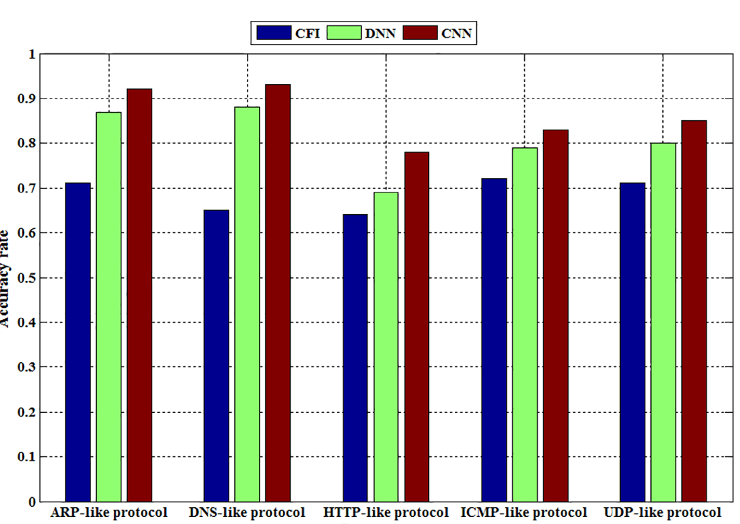

<h3>Conclusion

Les deux graphiques illustrent des performances élevées pour les approches basées sur le CNN, avec des similarités notables dans les taux de précision atteints pour les protocoles ARP, DNS, ICMP et TCP, qui dépassent généralement 95%. Cela confirme la capacité des réseaux convolutionnels à bien capturer les caractéristiques des protocoles.

<h3>Prédiction sur une image 


first image to predict: 
actual label: ICMP
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
prediction : ICMP


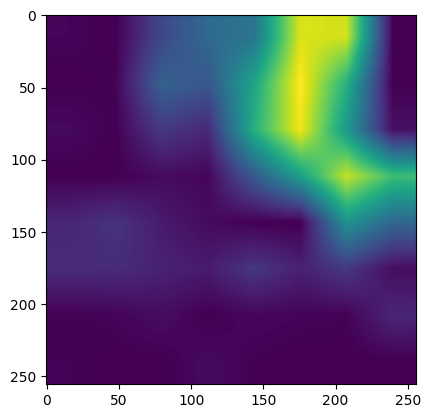

In [51]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print('first image to predict: ')
    plt.imshow(first_image)
    print('actual label:', class_names[first_label])

    batch_pred = model.predict(image_batch)
    print('prediction :',class_names[np.argmax(batch_pred[0])])

<h3>Sauvegarde du modèle entraîné


In [52]:
model.save("../model/model.keras")

<h2>Opinion sur l'article original

L'article original présente une méthodologie solide et innovante pour l'analyse de protocoles réseau. Son utilisation des CNN pour transformer les données réseau en images représente une approche novatrice qui exploite efficacement les capacités des modèles de deep learning. Cependant, l'article manque de détails sur certains aspects expérimentaux, comme les paramètres exacts de prétraitement et les hyperparamètres du modèle, ce qui rend la reproduction exacte difficile.<br>

Malgré cela, notre implémentation montre que les principes décrits dans l'article sont efficaces et applicables. Toutefois, l'approche pourrait bénéficier d'une documentation plus détaillée et d'une analyse approfondie des performances pour mieux comprendre les variations entre différents types de protocoles.

<h2>Conclusion générale

Dans le cadre de ce projet, nous avons implémenté une preuve de concept basée sur l'article intitulé "An unknown protocol syntax analysis method based on convolutional neural network". Ce travail a consisté à reproduire la méthodologie de l'article afin d'analyser la syntaxe des protocoles réseau à l'aide de réseaux de neurones convolutifs (CNN). L'approche décrite dans l'article original a été suivie de manière systématique, avec quelques ajustements mineurs pour répondre à des contraintes techniques ou expérimentales.<br>

Nous avons commencé par une étape de prétraitement, où les fichiers PCAP ont été convertis en images 8x8 en niveaux de gris, représentant les données binaires des paquets réseau. Ces images ont ensuite été utilisées pour entraîner un modèle CNN avec une architecture proche de celle décrite dans l'article. Les phases d’entraînement, de validation et de test ont été menées en utilisant un ensemble de données préparé spécifiquement pour le projet. Une évaluation approfondie des performances du modèle a été réalisée à l'aide de métriques telles que l'exactitude par classe, la perte, et la précision globale.<br>

Les résultats obtenus dans ce projet montrent une performance globalement élevée de notre modèle CNN, avec une précision significative pour chaque protocole réseau. Cependant, en comparant nos résultats avec ceux de l'article original, certaines différences notables ont été observées :<br>

Précision globale : Nos résultats montrent une légère baisse de performance par rapport à l'article original, notamment pour le protocole UDP, où la précision est plus faible.<br>
Convergence : La convergence des pertes (loss) et des précisions montre des tendances similaires à l'article, mais avec une amplitude et des valeurs absolues différentes, probablement dues à des variations dans les paramètres d'entraînement ou les données utilisées.<br>
Per-class Accuracy : Bien que notre modèle performe très bien sur certains protocoles comme ARP et TCP, les résultats sont moins cohérents pour d'autres comme UDP, contrairement aux observations dans l'article.

<h2>Références

1. **Wang, Y., Bai, B., Hei, X., Zhu, L., Ji, W.**  
   *An unknown protocol syntax analysis method based on convolutional neural network*.  

2. **Documentation TensorFlow**  
   Documentation officielle de TensorFlow.  
   Disponible sur : [https://www.tensorflow.org](https://www.tensorflow.org)

3. **Documentation Scapy**  
   Documentation officielle de Scapy, outil utilisé pour la manipulation et l'analyse des paquets réseau.  
   Disponible sur : [https://scapy.net](https://scapy.net)